In [1]:
# 11:00 AM
# 11:15 AM
# 11:20 AM
import os
print(os.path.dirname(os.getcwd()).split('\\')[-1])

HW_7_TS_ML_Inputs-U10


# Oil Futures

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
from pathlib import Path

csvpath="C:/Users/CS_Knit_tinK_SC/Documents/My Data Sources/111321/04_oil_futures.csv"

#csvpath = Path('../Resources/oil_futures.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

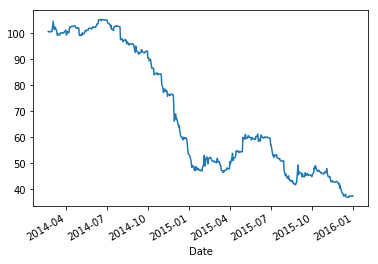

In [4]:
# More on settle prices: https://www.investopedia.com/terms/s/settlementprice.asp
df.Settle.plot()

### Calculate returns

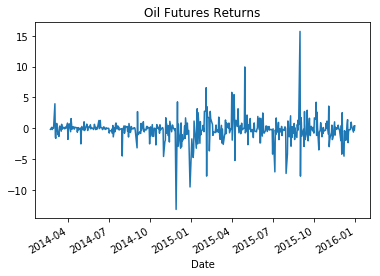

In [6]:
# Create a column of the settle price returns
returns = df.Settle.pct_change() * 100
returns.plot(title='Oil Futures Returns')

In [7]:
# Add columns of returns and lagged returns to the data frame
# The lagged returns are created to associate a date with its returns
df['Return'] = returns.copy()
df['Lagged_Return'] = returns.shift()  # creates a lag of 1, for autoregressive factor
# Drop NaN values
df = df.dropna()
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Lagged_Return,Return
Date,,,,,,,,,,
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0,-0.168684,0.159030
2014-02-25,100.57,100.57,100.57,100.57,0.20,100.57,81.0,12827.0,0.159030,-0.198472
2014-02-26,100.69,100.69,100.69,100.69,0.12,100.69,0.0,12776.0,-0.198472,0.119320
2014-02-27,100.67,100.67,100.67,100.67,0.02,100.67,0.0,12776.0,0.119320,-0.019863
2014-02-28,100.68,100.68,100.68,100.68,0.01,100.68,0.0,12776.0,-0.019863,0.009933


# Prepare the Features (X) and the Target (y)

In [8]:
# Set y as the `Return` column
y = df['Return']

In [9]:
# Select the `Lagged_Return` as a DataFrame
X = df['Lagged_Return'].to_frame()
X.head()

,Lagged_Return
Date,
2014-02-24,-0.168684
2014-02-25,0.159030
2014-02-26,-0.198472
2014-02-27,0.119320
2014-02-28,-0.019863


In [10]:
# Access the weekofyear attribute from the index
# Create a new column with this called `Week_of_year`
X['Week_of_year'] = X.index.weekofyear
X.head()

C:\Users\CS_Knit_tinK_SC\anaconda3\envs\TSMLPyViz\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


,Lagged_Return,Week_of_year
Date,,
2014-02-24,-0.168684,9
2014-02-25,0.159030,9
2014-02-26,-0.198472,9
2014-02-27,0.119320,9
2014-02-28,-0.019863,9


### Get dummy variables for week and year

In [11]:
# Use `get_dummies` to generate the features for each week of the year
X_binary_encoded = pd.get_dummies(X, columns=['Week_of_year'])
X_binary_encoded.head()

,Lagged_Return,Week_of_year_1,Week_of_year_2,Week_of_year_3,Week_of_year_4,Week_of_year_5,Week_of_year_6,Week_of_year_7,Week_of_year_8,Week_of_year_9,...,Week_of_year_44,Week_of_year_45,Week_of_year_46,Week_of_year_47,Week_of_year_48,Week_of_year_49,Week_of_year_50,Week_of_year_51,Week_of_year_52,Week_of_year_53
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-24,-0.168684,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-25,0.159030,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-26,-0.198472,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-27,0.119320,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2014-02-28,-0.019863,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression

In [12]:
# Create a Linear Regression model and fit it to the data
model = LinearRegression()
model.fit(X_binary_encoded, y)

LinearRegression()

In [13]:
# List the first 10 predicted values
predictions = model.predict(X_binary_encoded)
predictions[:10]

array([-0.09408009, -0.19278838, -0.08510803, -0.18082762, -0.13890543,
        0.22904997, -0.96762181,  0.66360517,  0.72241888,  0.19940254])

# Evaluating the Model

Evaluate the model using r2, mse, rmse

Compare the rmse to the standard deviation.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate r2_score (r-squared)
r2 = r2_score(y, predictions)
print(f"r2: {r2}")

r2: 0.20040272358975764


In [15]:
# Calculate mean squared error 
# Remember, a "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.
mse = mean_squared_error(y, predictions)

In [16]:
# Using mean squared error above, calculate root-mean-squared error (RMSE)
rmse = np.sqrt(mse)

In [17]:
# Print the r2, mser, rmse, and standard deviation
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Futures Return: {np.std(y)}")

R-squared (R2 ): 0.20040272358975764
Mean Squared Error (MSE): 2.986192493983914
Root Mean Squared Error (RMSE): 1.7280603270672914
Standard Deviation of Futures Return: 1.9325166602824382


# break